In [1]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
# stat_graph_df = DataLoader.load_csv_stat_graph(False)
# stat_trans_graph_df = DataLoader.load_csv_stat_graph(True)

Number of apps: 
418


Total entries:
2129


Number of apps: 
418


Total entries:
2129


Total covered methods:
4233096


Everything is good!


Total entries:
2129


Coverage_report

In [2]:
test_graph_df.head()

,source,target,action,widget_id,widget,strategy,app
0,dil.pie_recipe.FirstActivity,dil.pie_recipe.ShareActivity,click,-1.000000e+00,android.widget.ImageButton,systematic,dil.pie_recipe
1,dil.pie_recipe.FirstActivity,dil.pie_recipe.ShareActivity,click,2.131624e+09,android.support.v7.widget.AppCompatImageButton,systematic,dil.pie_recipe
2,dil.pie_recipe.RecipeActivity,dil.pie_recipe.FirstActivity,back,NaN,NaN,random,dil.pie_recipe
3,dil.pie_recipe.RecipeActivity,dil.pie_recipe.PrintRecipe,click,2.131624e+09,android.support.v7.widget.AppCompatImageButton,random,dil.pie_recipe
4,dil.pie_recipe.PrintRecipe,dil.pie_recipe.RecipeActivity,back,NaN,NaN,random,dil.pie_recipe


In [3]:
test_graph_df.groupby(["strategy", "app"]).count().head()
# test_graph_df[(test_graph_df.app == "com.singapore.buyusedcars")]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>5</td>
      <td>5</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>appinventor.ai_agiapplications.CountYourSteps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [4]:
# valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
#                                  (test_graph_df.target != "com.google.android.gms.ads.AdActivity")]
valid_test_graph = test_graph_df.replace("com.google.android.gms.ads.AdActivity", np.nan)

valid_test_graph.groupby(["strategy", "app"]).count().head()
# valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>3</td>
      <td>3</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>appinventor.ai_agiapplications.CountYourSteps</th>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
coverage_df.head()


,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,dil.pie_recipe,dil.pie_recipe.BuildConfig,BuildConfig (): void,systematic,method,0,0,1,dil.pie_recipe
1,dil.pie_recipe,dil.pie_recipe.BuildConfig,BuildConfig (): void,systematic,block,0,0,3,dil.pie_recipe
2,dil.pie_recipe,dil.pie_recipe.CommentsActivity,CommentsActivity (): void,systematic,method,0,0,1,dil.pie_recipe
3,dil.pie_recipe,dil.pie_recipe.CommentsActivity,CommentsActivity (): void,systematic,block,0,0,12,dil.pie_recipe
4,dil.pie_recipe,dil.pie_recipe.CommentsActivity,access$000 (CommentsActivity): ArrayList,systematic,method,0,0,1,dil.pie_recipe


In [6]:
coverage_per_app = coverage_df[(coverage_df.coverage_type == "method")].groupby(["strategy", "app"]).apply(
    lambda x: x.coverage_percentage.sum() / x.coverage_percentage.count())


In [7]:
valid_test_graph[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,418
systematic,1,418


In [8]:
coverage_per_app.groupby(['strategy']).nunique()

strategy
random        355
systematic    350
dtype: int64

In [9]:
coverage_df[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,418
systematic,1,418


In [10]:

coverage_with_test_graph = valid_test_graph.groupby(["strategy", "app"]).count().join(coverage_per_app.to_frame(name='coverage')).reset_index()
# coverage_per_app.head()
coverage_with_test_graph.head()


,strategy,app,source,target,action,widget_id,widget,coverage
0,random,alex.map.maps,3,3,5,2,2,51.219512
1,random,androidlab.carlog,1,0,0,0,0,17.230769
2,random,appinventor.ai_agiapplications.CountYourSteps,1,0,1,1,1,0.000000
3,random,asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
4,random,bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,6.605148


In [11]:
coverage_with_test_graph[(coverage_with_test_graph.app == "bth.studio.quickcharge")]


,strategy,app,source,target,action,widget_id,widget,coverage
13,random,bth.studio.quickcharge,21,21,21,20,20,38.275862
431,systematic,bth.studio.quickcharge,9,9,9,9,9,36.034483


In [12]:
temp = coverage_per_app.to_frame().reset_index()
temp[(temp.app == "bth.studio.quickcharge")]


,strategy,app,0
13,random,bth.studio.quickcharge,38.275862
431,systematic,bth.studio.quickcharge,36.034483


In [13]:
valid_test_graph[(valid_test_graph.app == "co.mobius.vrcinema")].groupby(["strategy", "app"]).count()

,,source,target,action,widget_id,widget
strategy,app,,,,,
random,co.mobius.vrcinema,1,1,1,1,1
systematic,co.mobius.vrcinema,1,1,1,1,1


In [14]:
random_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "random")].drop('strategy', 1).set_index('app')
systematic_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "systematic")].drop('strategy', 1).set_index('app')

diff_in_coverage_per_app = random_coverage_with_test_graph['coverage'] - systematic_coverage_with_test_graph['coverage']
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame()
diff_in_coverage_per_app.head()

# diff_in_coverage_per_app[diff_in_coverage_per_app.isnull().any(axis=1)]

,coverage
app,
alex.map.maps,29.268293
androidlab.carlog,-1.846154
appinventor.ai_agiapplications.CountYourSteps,0.000000
asp.aniemo.pack6.ext,0.000000
bestfreelivewallpapers.funny_photo_editor,2.185527


In [15]:
diff_in_graph_per_app = random_coverage_with_test_graph['source'] - systematic_coverage_with_test_graph['source']
diff_in_graph_per_app = diff_in_graph_per_app.to_frame()
diff_in_graph_per_app.head()

# diff_in_graph_per_app[diff_in_graph_per_app.isnull().any(axis=1)]

,source
app,
alex.map.maps,2
androidlab.carlog,0
appinventor.ai_agiapplications.CountYourSteps,0
asp.aniemo.pack6.ext,0
bestfreelivewallpapers.funny_photo_editor,0


,source,coverage
source,1.000000,0.273353
coverage,0.273353,1.000000


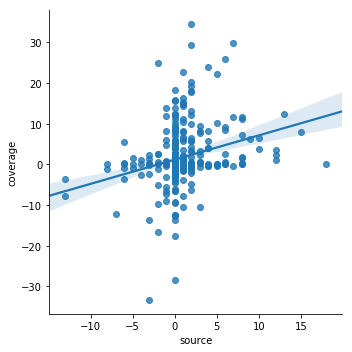

In [16]:
diff_result = pd.concat([diff_in_graph_per_app, diff_in_coverage_per_app], axis=1, sort=False)
# diff_result.plot.scatter(x='source', y='coverage')
sns.lmplot(x='source', y='coverage', data=diff_result.dropna(how='any'), fit_reg=True)
diff_result.dropna(how='any').corr()


In [17]:
random_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,3,3,5,2,2,51.219512
androidlab.carlog,1,0,0,0,0,17.230769
appinventor.ai_agiapplications.CountYourSteps,1,0,1,1,1,0.000000
asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,6.605148


In [18]:
systematic_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,1,1,21.951220
androidlab.carlog,1,0,0,0,0,19.076923
appinventor.ai_agiapplications.CountYourSteps,1,0,0,0,0,0.000000
asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,4.419621


In [19]:
number_of_unique_screens_per_app = valid_test_graph[['strategy', 'app', 'source', 'target']].melt(
    id_vars=['strategy', 'app'])

number_of_unique_screens_per_app.head()

,strategy,app,variable,value
0,systematic,dil.pie_recipe,source,dil.pie_recipe.FirstActivity
1,systematic,dil.pie_recipe,source,dil.pie_recipe.FirstActivity
2,random,dil.pie_recipe,source,dil.pie_recipe.RecipeActivity
3,random,dil.pie_recipe,source,dil.pie_recipe.RecipeActivity
4,random,dil.pie_recipe,source,dil.pie_recipe.PrintRecipe


In [20]:
ran_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'random')].drop(['strategy'],
                                                                                                       axis=1)
sys_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'systematic')].drop(['strategy'],
                                                                                                           axis=1)


In [21]:
diff_in_unique_screens = ran_n.groupby(['app']).value.nunique() - sys_n.groupby(['app']).value.nunique()
diff_in_unique_screens.head()


app
alex.map.maps                                    0
androidlab.carlog                                0
appinventor.ai_agiapplications.CountYourSteps    0
asp.aniemo.pack6.ext                             0
bestfreelivewallpapers.funny_photo_editor        0
Name: value, dtype: int64

,value,coverage
value,1.000000,0.411367
coverage,0.411367,1.000000


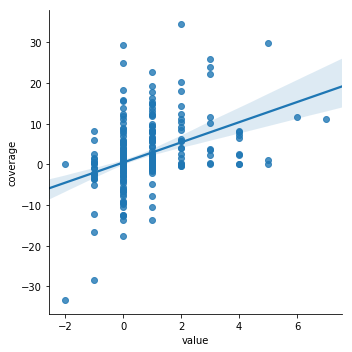

In [22]:
diff_result = pd.concat([diff_in_unique_screens.to_frame(), diff_in_coverage_per_app], axis=1, sort=False)
diff_result.head()
sns.lmplot(x='value', y='coverage', data=diff_result.dropna(how='any'), fit_reg=True)
diff_result.dropna(how='any').corr()